# Exploratory Data Analysis


#### Objective of this kernel:

* To understand the how the student's performance (CGPA) is affected by the other variables (AGE,WASCE GRADE, LEVEL, NUMBER OF SIBLINGS,ACCESS TO A LAPTOP,GROUP STUDY,INDEPENDENT STUDIES)

Lets import the required libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.


./input/Predicting_students_performance_using_machine_learning_algorithm.csv
./input/.ipynb_checkpoints/Predicting_students_performance_using_machine_learning_algorithm-checkpoint.csv


## Reading the data set

In [2]:
df=pd.read_csv('./input/Predicting_students_performance_using_machine_learning_algorithm.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                238 non-null    object
 1   Gender                             238 non-null    object
 2   wassce grade                       238 non-null    object
 3   level                              238 non-null    object
 4   current CGPA                       238 non-null    object
 5   number of siblings                 238 non-null    object
 6   access to a laptop or internet     238 non-null    object
 7   study group                        238 non-null    object
 8   time spent on independent studies  238 non-null    object
dtypes: object(9)
memory usage: 16.9+ KB


Here, you can see all the column names, total values and type of the values.

#### We have 2 types of variables.

1. Numerical variables : which contains number as values
2. Categorical variables : which contains descriptions of groups or things.

In this Data set,

Has No Numerical Variables .

Categorical Variables are Age,Gender, wasce grade,Cerrent CGPA,number of siblings,access to a laptop or internet,study group,time spent on independent studies

In [4]:
df.describe()

,Age,Gender,wassce grade,level,current CGPA,number of siblings,access to a laptop or internet,study group,time spent on independent studies
count,238,238,238,238,238,238,238,238,238
unique,5,2,6,2,6,3,3,2,3
top,23 - 27 years,Male,10 - 15,L 300,2.9 - 2.5,More than 3,Yes,Yes,More than 2 hours
freq,115,166,101,134,83,96,190,154,126


You can see the descriptive statistics of numerical variables such as total count, unique values,the first value of each column,frequency

In [5]:
df.shape

(238, 9)

It shows the number of rows and columns.

In [6]:
df.isnull().sum() #checks if there are any missing values

Age                                  0
Gender                               0
wassce grade                         0
level                                0
current CGPA                         0
number of siblings                   0
access to a laptop or internet       0
study group                          0
time spent on independent studies    0
dtype: int64

So there are no missing values in the data

# Before we proceed all the data lets convert all object type to categorical data


In [7]:
list_str_obj_cols = df.columns[df.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    df[str_obj_col] = df[str_obj_col].astype("category")

df.dtypes

Age                                  category
Gender                               category
wassce grade                         category
level                                category
current CGPA                         category
number of siblings                   category
access to a laptop or internet       category
study group                          category
time spent on independent studies    category
dtype: object

### Lets start with plotting graphs

We want to analyse the CGPA of the students.

* So lets see the distribution of 
 * Age , Gender , wassce grade , level , current CGPA,number of siblings,access to a laptop or internet ,study group ,time spent on independent studies

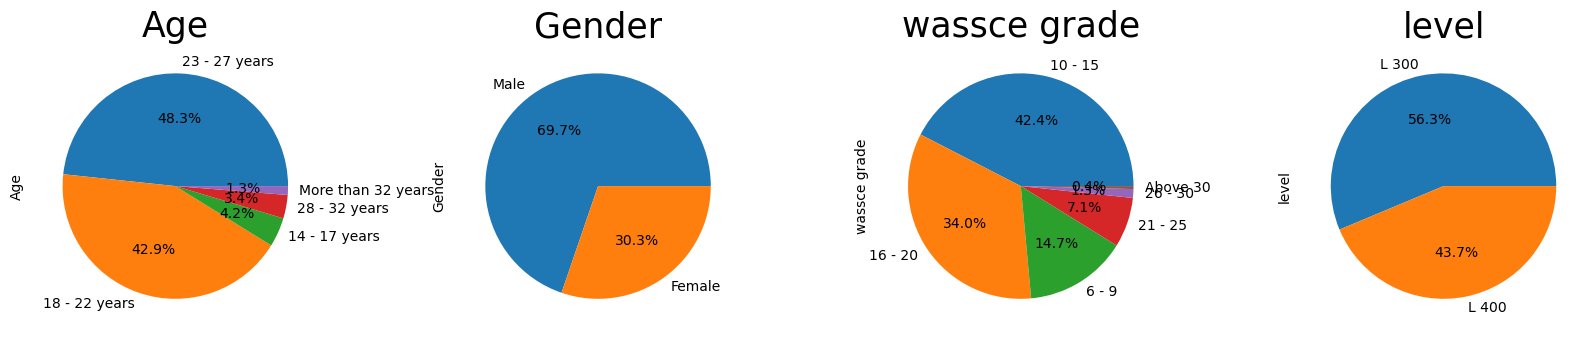

In [8]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Age',fontsize = 25)
df['Age'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(142)
plt.title('Gender',fontsize = 25)
df['Gender'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(143)
plt.title('wassce grade',fontsize = 25)
df['wassce grade'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(144)
plt.title('level',fontsize = 25)
df['level'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

Observations:
* The proportion of male are higher than that and female 
* Highest age range of students belong to Group 23-27 ethinicity followed by Group 18-22
* Highest proportion of the students  wassce grade belong to Group 10-15 
* Highest proportion of students are in level 300

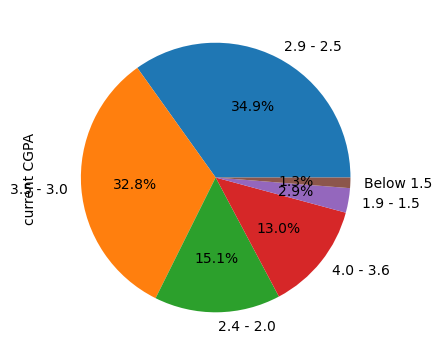

In [9]:
plt.figure(figsize=(20,10))
plt.subplot(144)
plt.title('',fontsize = 25)
df['current CGPA'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

Observations:
* Highest number of students belong to Group 2.9-2.5 followed by Group 3.5-3.0


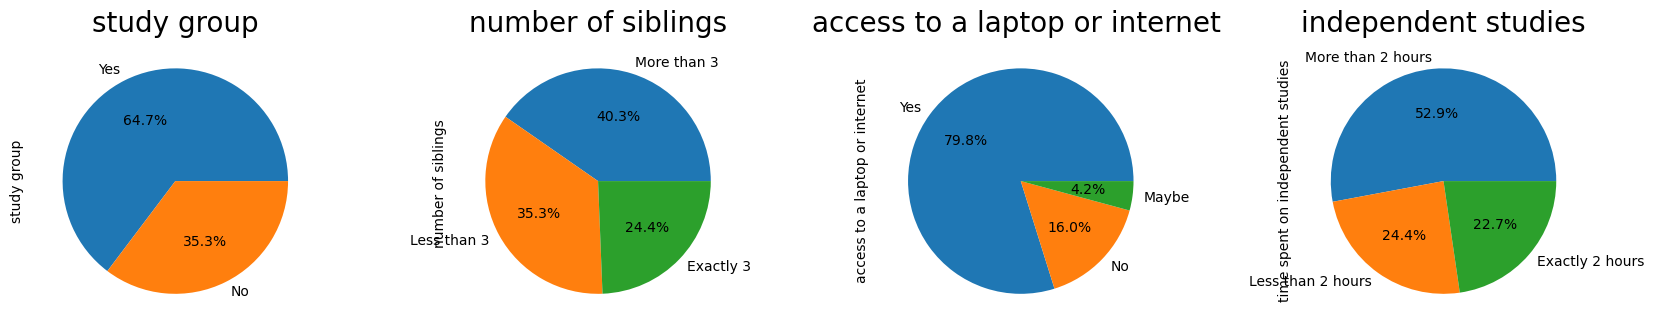

In [10]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('study group',fontsize = 20)
df['study group'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(142)
plt.title('number of siblings',fontsize = 20)
df['number of siblings '].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(143)
plt.title('access to a laptop or internet ',fontsize = 20)
df['access to a laptop or internet'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(144)
plt.title('independent studies',fontsize = 20)
df['time spent on independent studies'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

* The proportion of students who have study group are higher
* Highest number of students have more than 3 sibilings
* Highest proportion of the students have access to labtops and internet
* Highest proportion of the students  have more than 2 hours of independent studies

# Lets look at the relationship between all columns  


Relations between Age and current CGPA
Relations between Gender and current CGPA
Relations between wassce grade and current CGPA
Relations between level and current CGPA
Relations between number of siblings and current CGPA
Relations between access to a laptop or internet and current CGPA
Relations between study group and current CGPA
Relations between time spent on independent studies and current CGPA

<AxesSubplot:xlabel='time spent on independent studies', ylabel='count'>

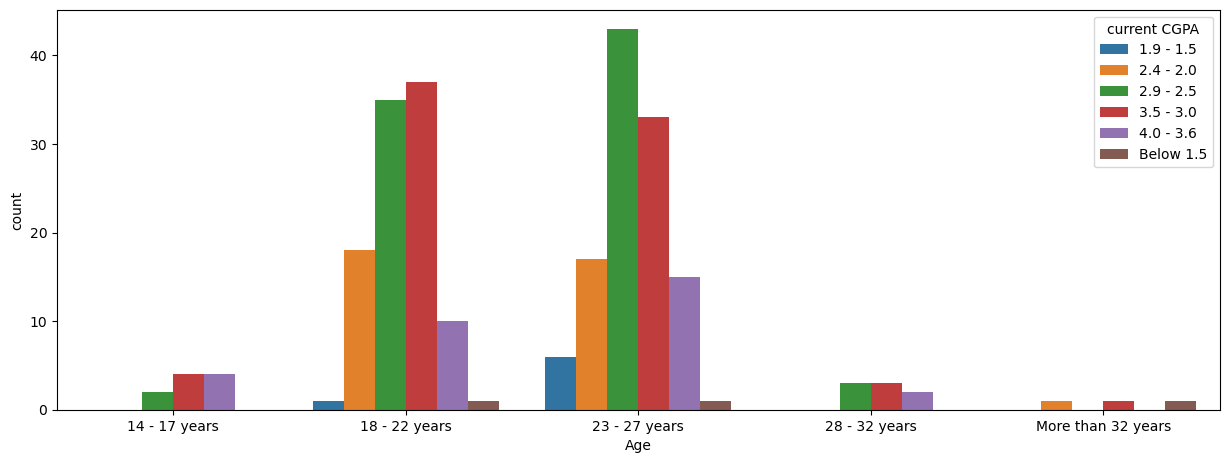

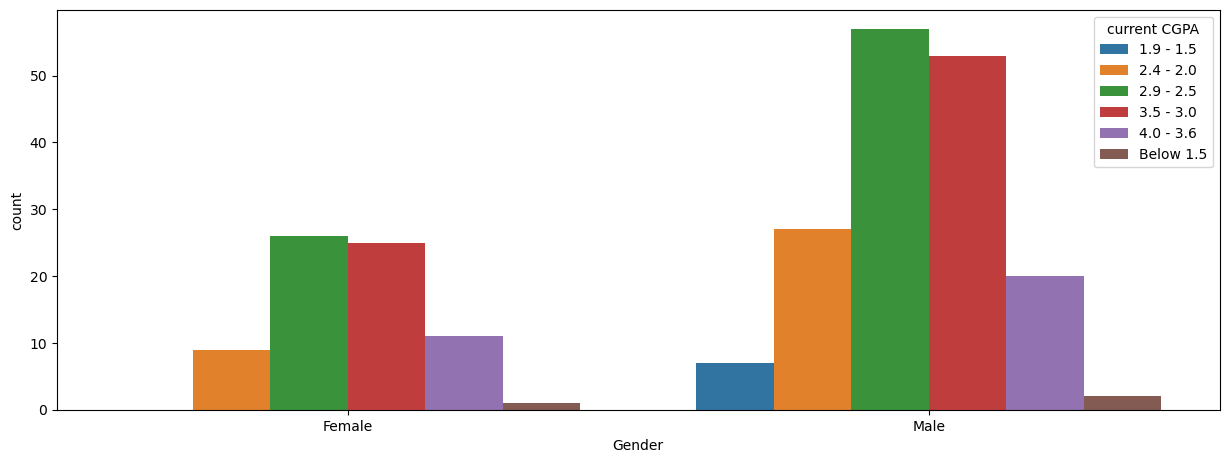

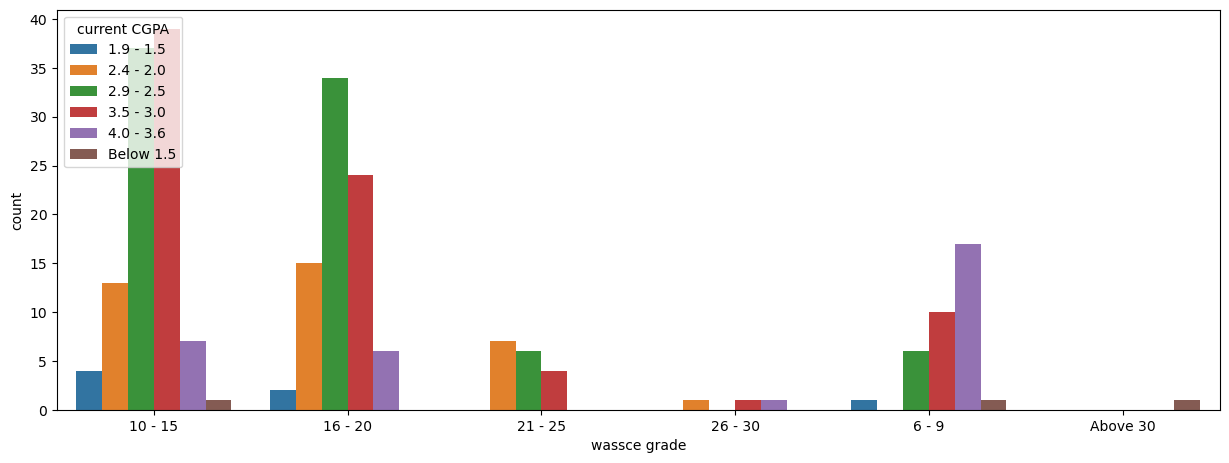

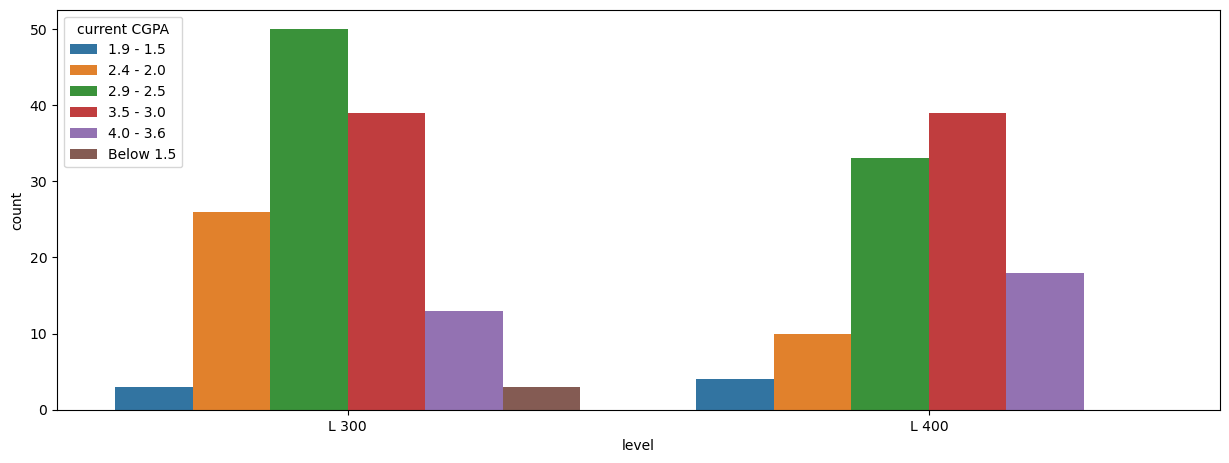

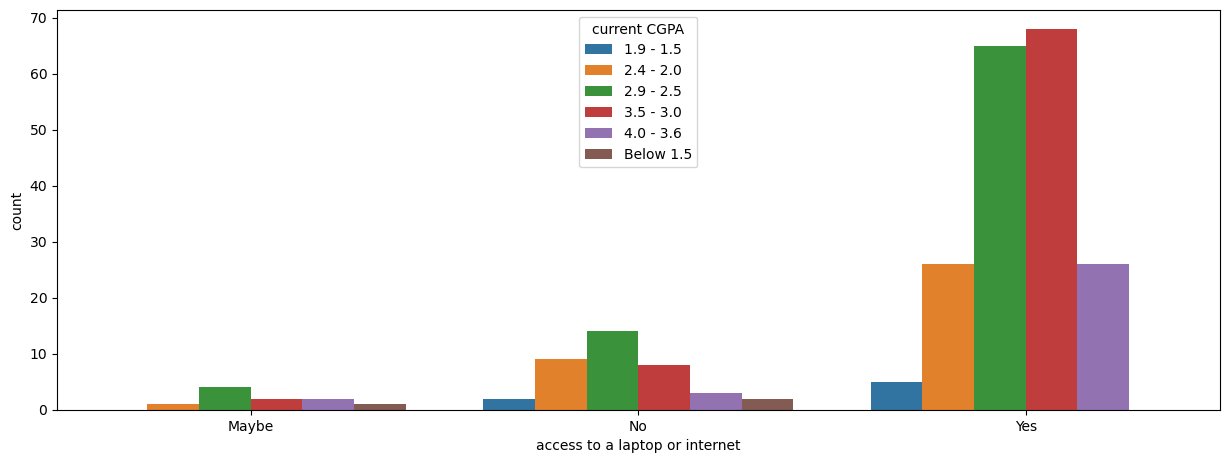

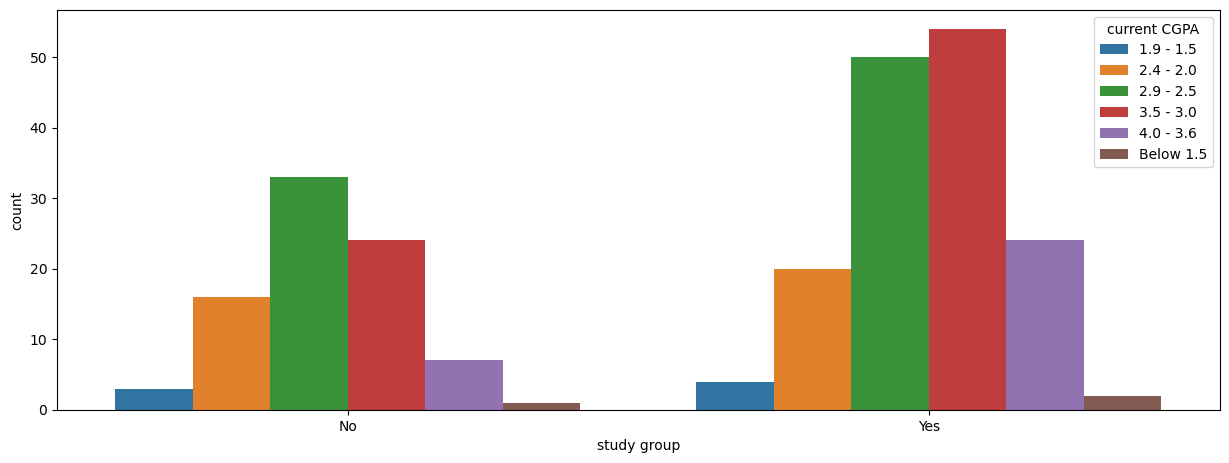

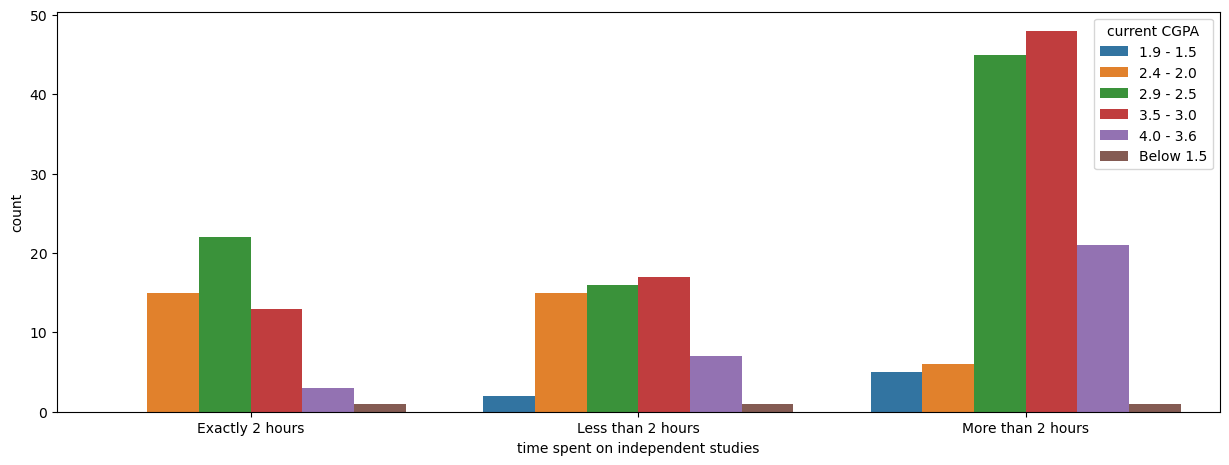

In [11]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
## Relationship between  Age and current cgpa
sns.countplot(x="Age", hue="current CGPA", data=df) 
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
sns.countplot(x="Gender", hue="current CGPA", data=df) 

plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
sns.countplot(x="wassce grade", hue="current CGPA", data=df) 

plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
sns.countplot(x="level", hue="current CGPA", data=df)

# plt.figure(figsize=(15,5))
# plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
#                       wspace=0.5, hspace=0.2)
# sns.countplot(x="number of siblings", hue="current CGPA", data=df)

plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
sns.countplot(x="access to a laptop or internet", hue="current CGPA", data=df)

plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
sns.countplot(x="study group", hue="current CGPA", data=df)


plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
sns.countplot(x="time spent on independent studies", hue="current CGPA", data=df)



Observations:
* The proportion of students who have study group are higher
* Highest number of students have more than 3 sibilings
* Highest proportion of the students have access to labtops and internet
* Highest proportion of the students  have more than 2 hours of independent studies

# We are going to  check for unique data in the current CGPA column
* and assign proper grades

In [12]:
df['current CGPA'].unique()

['2.9 - 2.5', '1.9 - 1.5', '3.5 - 3.0', '4.0 - 3.6', '2.4 - 2.0', 'Below 1.5']
Categories (6, object): ['1.9 - 1.5', '2.4 - 2.0', '2.9 - 2.5', '3.5 - 3.0', '4.0 - 3.6', 'Below 1.5']

##### Lets assign grades.

Criteria of the grades are as follows:

* 4.0 - 3.6 : First class
* 3.5 - 3.0 : Second class upper
* 2.9 - 2.5 : Second class lower
* 2.4 - 2.0 : Third class
* 1.9 - 1.5 : Pass
* Below 1.5 : Fail

In [13]:
#Assigning the grades

def determine_grade(scores):
    if scores =='4.0 - 3.6':
        return 'First class'
    elif scores == '3.5 - 3.0':
        return 'Second class upper'
    elif scores == '2.9 - 2.5':
        return 'Second class lower'
    elif scores =='2.4 - 2.0':
        return 'Third class'
    elif scores =='1.9 - 1.5':
        return 'Pass'
    elif scores =='Below 1.5':
        return 'Fail'
    
df['grades']=df['current CGPA'].apply(determine_grade)
df

,Age,Gender,wassce grade,level,current CGPA,number of siblings,access to a laptop or internet,study group,time spent on independent studies,grades
0,23 - 27 years,Male,16 - 20,L 400,2.9 - 2.5,More than 3,Yes,Yes,More than 2 hours,Second class lower
1,23 - 27 years,Male,6 - 9,L 400,1.9 - 1.5,Less than 3,Yes,Yes,More than 2 hours,Pass
2,23 - 27 years,Male,10 - 15,L 400,3.5 - 3.0,Exactly 3,Yes,Yes,Less than 2 hours,Second class upper
3,23 - 27 years,Female,10 - 15,L 400,2.9 - 2.5,Exactly 3,Yes,Yes,More than 2 hours,Second class lower
4,23 - 27 years,Female,10 - 15,L 400,2.9 - 2.5,Less than 3,Yes,Yes,More than 2 hours,Second class lower
...,...,...,...,...,...,...,...,...,...,...
233,18 - 22 years,Male,6 - 9,L 400,4.0 - 3.6,Less than 3,Yes,Yes,More than 2 hours,First class
234,18 - 22 years,Male,6 - 9,L 300,Below 1.5,More than 3,Maybe,No,More than 2 hours,Fail
235,More than 32 years,Female,Above 30,L 300,Below 1.5,More than 3,No,Yes,Less than 2 hours,Fail
236,18 - 22 years,Female,16 - 20,L 300,3.5 - 3.0,More than 3,Yes,Yes,More than 2 hours,Second class upper


## We are going to write our results to an output file named processed_data.csv

In [19]:
df.to_csv("./output/processed_data.csv",index_label=False)

## End of our Exploratory data analysis

In [15]:
# dummy_df = pd.get_dummies(df['current CGPA'])
# # new_df = pd.concat([df,dummy_df],axis='columns')
# new_df = df
# # new_df['current CGPA'].replace(['Below 1.5','1.9 - 1.5','2.4 - 2.0','2.9 - 2.5','3.5 - 3.0','4.0 - 3.6'],[1,2,3,4,5,6],inplace=True)
# # new_df['Age'].replace(['14 - 17 years','18 - 22 years','23 - 27 years','28 - 32 years','More than 32 years'],[1,2,3,4,5],inplace=True)
# # new_df['wassce grade'].replace([],[],inplace=True)
# # new_df['number of siblings'].replace([],[],inplace=True)
# # new_df['access to a laptop or internet'].replace([],[],inplace=True)
# # new_df['time spent on independent studies'].replace([],[],inplace=True)
# # new_df['Gender'].replace([],[],inplace=True)
# new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Age                                238 non-null    category
 1   Gender                             238 non-null    category
 2   wassce grade                       238 non-null    category
 3   level                              238 non-null    category
 4   current CGPA                       238 non-null    category
 5   number of siblings                 238 non-null    category
 6   access to a laptop or internet     238 non-null    category
 7   study group                        238 non-null    category
 8   time spent on independent studies  238 non-null    category
dtypes: category(9)
memory usage: 3.6 KB


#### Observations:
* The proportion of students who have study group are higher
* Highest number of students have more than 3 sibilings
* Highest proportion of the students have access to labtops and internet
* Highest proportion of the students  have more than 2 hours of independent studies